Complete the exercises below For **Assignment #2**.

First, load the `Tidyverse` package which imports data visualization and wrangling libraries that we need.

In [5]:
# uncomment the code below and execute this cell
library('tidyverse')

If you are unable to load the `Tidyverse` package, you may not have it installed. Please refer to the assignment `README` for instructions to update your `data730` environment to include the `Tidyverse` package.

## Data visualization

Let's work with the [Palmer Penguins data](https://allisonhorst.github.io/palmerpenguins/).

In [6]:
# uncomment the code below and execute this cell
library('palmerpenguins')
glimpse(penguins)

Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, …
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1, …
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 186…
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475, …
$ sex               <fct> male, female, female, NA, female, male, female, male…
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007…


We now have a data frame called `penguins` available. Use this table for the following exercises.

### Bar chart

In the cell below make a bar chart that shows how many penguins are in the data from each island. Encode the penguin species as the `fill` attribute of the bars.

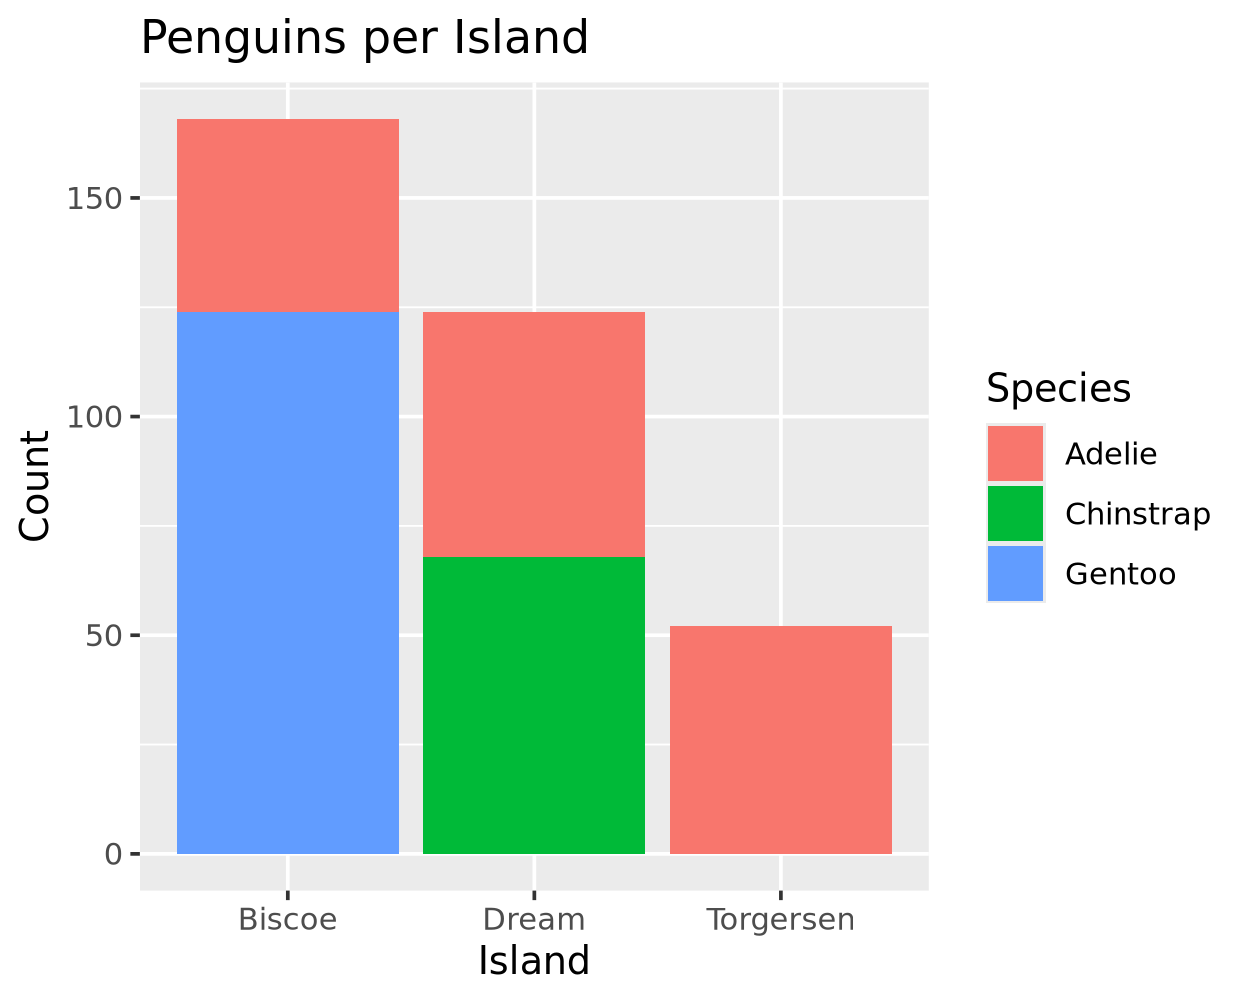

In [7]:
penguins %>%
    ggplot(aes(x = island, fill = species)) +
    geom_bar() +
    labs(title = "Penguins per Island", x = "Island", y = "Count", fill = "Species")

**In which islands were *Adelie* penguins observed?** Answer using a [markdown list](https://www.markdownguide.org/basic-syntax/#lists-1) in the cell below. 

⚠️ Remember to switch the cell type to `Markdown`.

Biscoe, Dream, and Torgerson

### Scatter chart

Make a scatter chart of bill depth versus bill length. Color the points by penguin species. Add a `scale` modification to your chart to adjust the color palette (e.g. add `scale_color_brewer(palette = "Set2")`).

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


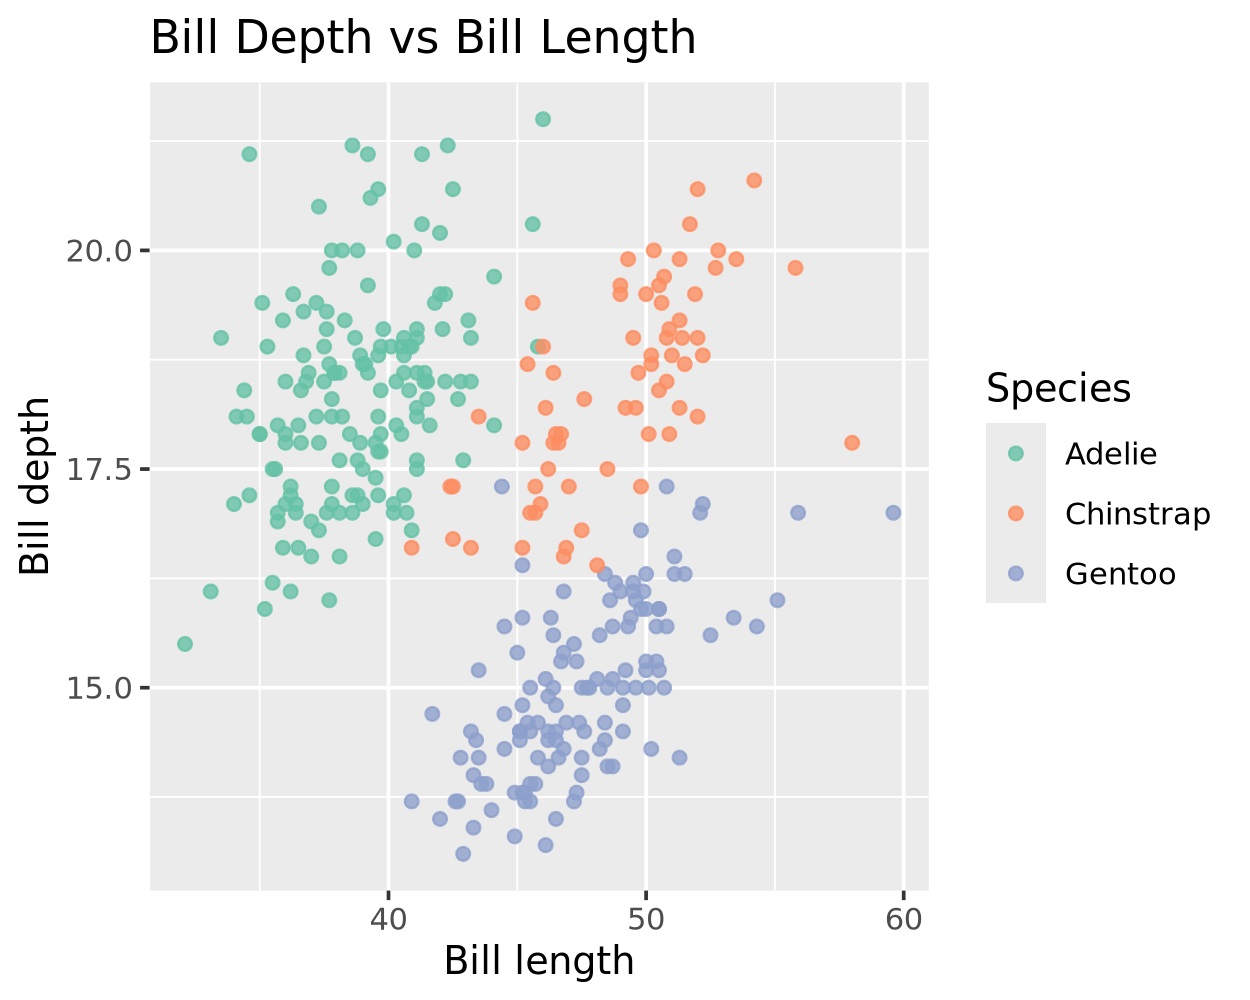

In [8]:
penguins %>%
    ggplot(aes(x = bill_length_mm, y = bill_depth_mm, color = species)) +
    geom_point(alpha = 0.8) +
    labs(title = "Bill Depth vs Bill Length", x = "Bill length", y = "Bill depth", color = "Species") +
    scale_color_brewer(palette = "Set2") 

### Histogram

Make a histogram of penguin body mass. 
- Facet your chart by the `sex` column using the `facet_wrap` function and setting the `ncol` parameter to `1`.
- In your `geom_histogram` layer, set the `position` argument to `"identity"` and set `alpha`to a value between `0` and `1`.
- Map penguin species to the `fill` property.
- Adjust the `fill` scale palette similarly to how we adjusted the `color` scale palette above. I.e. change to the [ColorBrewer](https://colorbrewer2.org/) `"Set2"` palette.

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


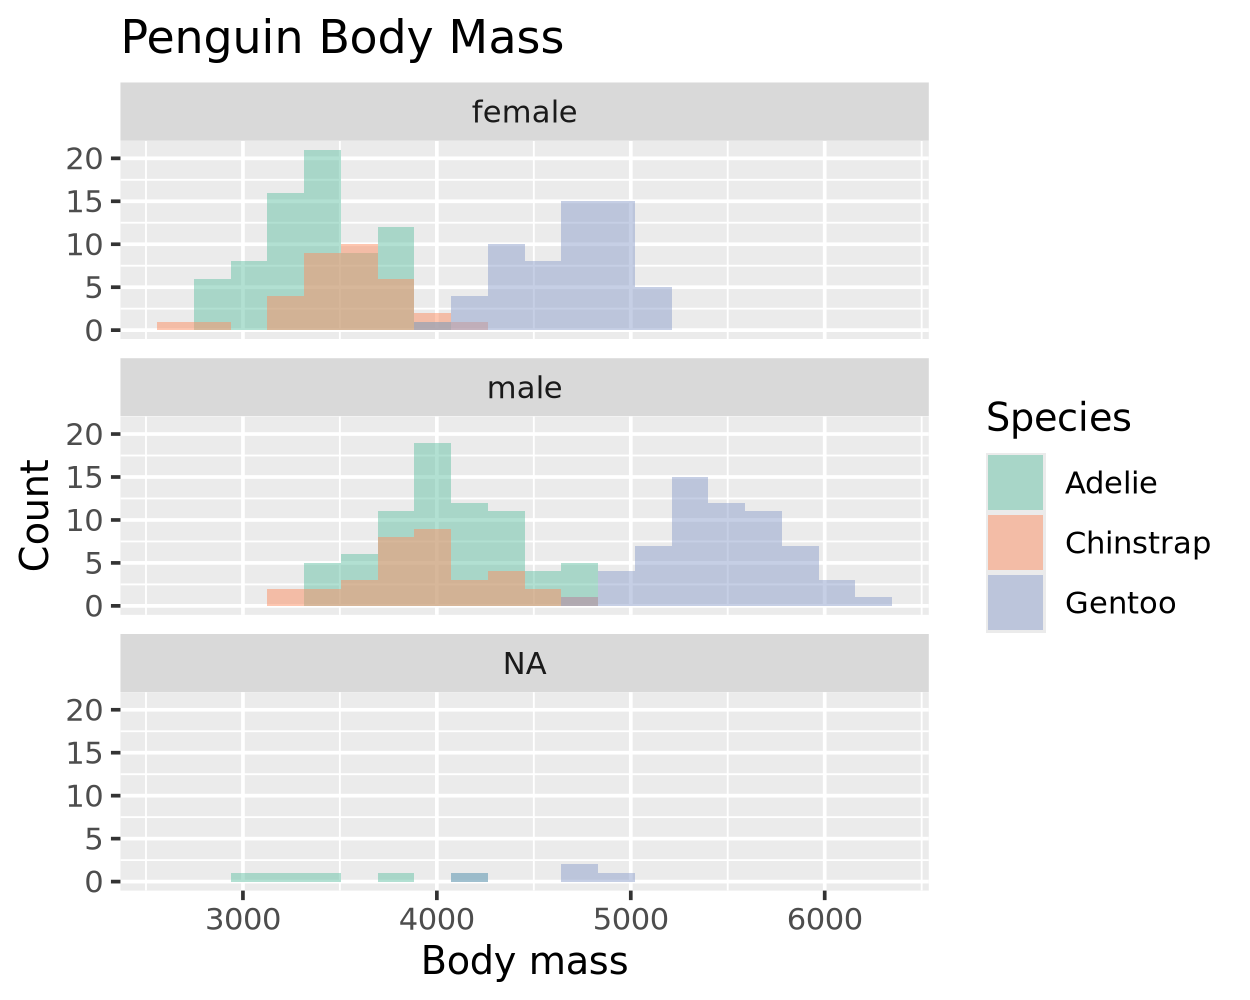

In [13]:
penguins %>%
    ggplot(aes(x = body_mass_g, fill = species)) +
    facet_wrap(~ sex, ncol = 1) +
    geom_histogram(position = "identity", alpha = 0.5, bins = 20) +
    labs(title = "Penguin Body Mass", x = "Body mass", y = "Count", fill = "Species") +
    scale_fill_brewer(palette = "Set2")

What happens when you don't have `position = "identity"` in your `geom_histogram` layer? Answer below in a `Markdown` cell.

It makes more difficult to analyze because the bins stack on top of each other.

## Data wrangling

First we are going to bring in a data set to practice with called `txhousing`. You can find some information about `txhousing` [here](https://ggplot2.tidyverse.org/reference/txhousing.html).

In [14]:
# uncomment the next two lines and execute this cell
data(txhousing)
glimpse(txhousing)

Rows: 8,602
Columns: 9
$ city      <chr> "Abilene", "Abilene", "Abilene", "Abilene", "Abilene", "Abil…
$ year      <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, …
$ month     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, …
$ sales     <dbl> 72, 98, 130, 98, 141, 156, 152, 131, 104, 101, 100, 92, 75, …
$ volume    <dbl> 5380000, 6505000, 9285000, 9730000, 10590000, 13910000, 1263…
$ median    <dbl> 71400, 58700, 58100, 68600, 67300, 66900, 73500, 75000, 6450…
$ listings  <dbl> 701, 746, 784, 785, 794, 780, 742, 765, 771, 764, 721, 658, …
$ inventory <dbl> 6.3, 6.6, 6.8, 6.9, 6.8, 6.6, 6.2, 6.4, 6.5, 6.6, 6.2, 5.7, …
$ date      <dbl> 2000.000, 2000.083, 2000.167, 2000.250, 2000.333, 2000.417, …


Write a code chunk to remove the inventory variable. Save the results in a data frame called `txhousing`. Use `glimpse` or `head` to confirm you have removed the variable.

In [19]:
txhousing <- txhousing %>% select(inventory)

ERROR: [1m[33mError[39m in `select()`:[22m
[33m![39m Can't select columns that don't exist.
[31m✖[39m Column `inventory` doesn't exist.


In [20]:
glimpse(txhousing)

Rows: 8,602
Columns: 8
$ city     <chr> "Abilene", "Abilene", "Abilene", "Abilene", "Abilene", "Abile…
$ year     <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2…
$ month    <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8…
$ sales    <dbl> 72, 98, 130, 98, 141, 156, 152, 131, 104, 101, 100, 92, 75, 1…
$ volume   <dbl> 5380000, 6505000, 9285000, 9730000, 10590000, 13910000, 12635…
$ median   <dbl> 71400, 58700, 58100, 68600, 67300, 66900, 73500, 75000, 64500…
$ listings <dbl> 701, 746, 784, 785, 794, 780, 742, 765, 771, 764, 721, 658, 7…
$ date     <dbl> 2000.000, 2000.083, 2000.167, 2000.250, 2000.333, 2000.417, 2…


Make a data set called `dallas_sub` that includes data only from the city of Dallas in 2012 & 2013.

In [21]:
dallas_sub <- txhousing %>%
    filter(city == "Dallas", year == 2012 | year == 2013)

Add a column to the `dallas_sub` data set called `prct_sold` that calculates the percentage of listings that were sold (`sales/listings * 100`). Be sure to save the results also as a data frame called `dallas_sub`.

In [22]:
dallas_sub <- dallas_sub %>%
    mutate(prct_sold = (sales / listings) * 100)

Calculate the average percentage of listings that were sold in Dallas in each month of the year based on your `dallas_sub` data set. Save the results of the calculation in an data frame called `dallas_summary`.

In [23]:
dallas_summary <- dallas_sub %>%
    group_by(month) %>%
    summarize(mean_prct_sold = mean(prct_sold))

Use `slice_max` to see the top 3 months with the greatest average percentage of listings sold from `dallas_summary`. You do not need to save the results.

In [24]:
dallas_summary %>%
    slice_max(mean_prct_sold, n = 3)

month,mean_prct_sold
<int>,<dbl>
8,38.51543
5,38.20168
6,37.19150


Run the following code chunk. Study the code, and the output. Explain in your own words what this code chunk calculated.

In [25]:
txhousing |>
  filter(year == 2012 | year == 2013, city == "Dallas") |>
  mutate(prct_sold = sales/listings *100) |>
  group_by(month) |>
  summarize(mean_prct_sold = mean(prct_sold)) |>
  slice_max(mean_prct_sold, n = 3)

month,mean_prct_sold
<int>,<dbl>
8,38.51543
5,38.20168
6,37.19150


Filter the dataset for points where the city is dallas and the years are either 2012-2013.
Creates new column that is a computation of other values. Computing percentage of listings sold.
Group by month and average across the % across 2012 and 2013
Return top 3 months for greatest average percentage of listings sold 